In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Data Collection

In [3]:
df = pd.read_csv("dataset.csv")
df

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,Female,31,Married,1,College,$12500 - $24999,Others,Friends,Sunny,28,...,NaN,often,often,NaN,Fast Food,Yes,1,0,0,1
12368,Female,36,Married,0,Bachelors degree,$25000 - $37499,Home,Alone,Rainy,13,...,sometimes,often,often,often,Coffee House,Yes,0,0,1,0
12369,Female,21,Partner,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,13,...,rarely,sometimes,sometimes,rarely,Coffee House,Yes,1,1,0,0
12370,Male,31,Married,0,College,$100000 or More,Work,Alone,Sunny,28,...,never,often,sometimes,sometimes,Fast Food,Yes,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12372 entries, 0 to 12371
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            12372 non-null  object
 1   age               12372 non-null  int64 
 2   maritalStatus     12372 non-null  object
 3   children          12372 non-null  int64 
 4   education         12372 non-null  object
 5   income            12372 non-null  object
 6   destination       12372 non-null  object
 7   passanger         12372 non-null  object
 8   weather           12372 non-null  object
 9   temperature       12372 non-null  int64 
 10  time              12372 non-null  int64 
 11  visitPub          12267 non-null  object
 12  visitCoffeeHouse  12158 non-null  object
 13  visitFastFood     12224 non-null  object
 14  visitFoodCourt    12244 non-null  object
 15  visitRestaurant   12186 non-null  object
 16  storeType         12372 non-null  object
 17  offerEndSoon

In [5]:
df.shape

(12372, 22)

In [6]:
df.isna().sum()

gender                0
age                   0
maritalStatus         0
children              0
education             0
income                0
destination           0
passanger             0
weather               0
temperature           0
time                  0
visitPub            105
visitCoffeeHouse    214
visitFastFood       148
visitFoodCourt      128
visitRestaurant     186
storeType             0
offerEndSoon          0
moreThan5km           0
moreThan15km          0
sameDirection         0
stopBy(y)             0
dtype: int64

Data Preprocessing

In [7]:
# Check unique values for ALL columns
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")


gender: ['Female' 'Male']
Number of unique values: 2

age: [21 26 31 46 36 41 18 55]
Number of unique values: 8

maritalStatus: ['Partner' 'Married' 'Single' 'Widowed' 'Divorced']
Number of unique values: 5

children: [0 1]
Number of unique values: 2

education: ['College' 'Graduate degree' 'Associates degree' 'High School Graduate'
 'Bachelors degree' 'High School']
Number of unique values: 6

income: ['$87500 - $99999' '$50000 - $62499' '$100000 or More' 'Less than $12500'
 '$25000 - $37499' '$75000 - $87499' '$62500 - $74999' '$12500 - $24999'
 '$37500 - $49999']
Number of unique values: 9

destination: ['Others' 'Home' 'Work']
Number of unique values: 3

passanger: ['Friends' 'Partner' 'Alone' 'Family']
Number of unique values: 4

weather: ['Sunny' 'Rainy' 'Snowy']
Number of unique values: 3

temperature: [28  0 13]
Number of unique values: 3

time: [18 10 22  7 14]
Number of unique values: 5

visitPub: ['sometimes' 'rarely' 'often' 'never' nan 'very often']
Number of unique value

In [8]:
# Check unique values in categorical columns
categorical_cols = ['gender', 'maritalStatus', 'education', 'destination', 'passanger', 'weather', 'storeType', 'offerEndSoon']

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
maritalStatus: ['Partner' 'Married' 'Single' 'Widowed' 'Divorced']
education: ['College' 'Graduate degree' 'Associates degree' 'High School Graduate'
 'Bachelors degree' 'High School']
destination: ['Others' 'Home' 'Work']
passanger: ['Friends' 'Partner' 'Alone' 'Family']
weather: ['Sunny' 'Rainy' 'Snowy']
storeType: ['Food Court' 'Coffee House' 'Fast Food' 'Pub' 'Restaurant']
offerEndSoon: ['Yes' 'No']


In [9]:
# 1. Handle missing values in visit columns
visit_cols = ['visitPub', 'visitCoffeeHouse', 'visitFastFood', 'visitFoodCourt', 'visitRestaurant']
for col in visit_cols:
    df[col] = df[col].fillna('sometimes')

# 2. Encode ordinal visit columns
ordinal_mapping = {'never': 0, 'rarely': 1, 'sometimes': 2, 'often': 3, 'very often': 4}
for col in visit_cols:
    df[f'{col}_encoded'] = df[col].map(ordinal_mapping)

# 3. Encode income column (ordinal)
income_mapping = {
    'Less than $12500': 0,
    '$12500 - $24999': 1, 
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}
df['income_encoded'] = df['income'].map(income_mapping)

# 4. Binary categorical columns (Label Encoding)
binary_cols = ['gender', 'offerEndSoon']
le = LabelEncoder()
for col in binary_cols:
    df[f'{col}_encoded'] = le.fit_transform(df[col])

# 5. Multi-class categorical columns (One-Hot Encoding)
multi_class_cols = ['maritalStatus', 'education', 'destination', 'passanger', 'weather', 'storeType']
df_encoded = pd.get_dummies(df, columns=multi_class_cols, prefix=multi_class_cols)

# 6. Drop original categorical columns
cols_to_drop = ['gender', 'maritalStatus', 'education', 'income', 'destination', 
                'passanger', 'weather', 'storeType', 'offerEndSoon'] + visit_cols
df_final = df_encoded.drop(columns=[col for col in cols_to_drop if col in df_encoded.columns])

# 7. Scale numerical features (your actual numerical columns)
numerical_cols = ['age', 'temperature', 'time']
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])


In [10]:
# Rename columns for better readability
df_final = df_final.rename(columns={
    # Visit frequency columns
    'visitPub_encoded': 'visit_pub',
    'visitCoffeeHouse_encoded': 'visit_coffee',
    'visitFastFood_encoded': 'visit_fastfood',
    'visitFoodCourt_encoded': 'visit_foodcourt',
    'visitRestaurant_encoded': 'visit_restaurant',
    'income_encoded': 'income',
    'gender_encoded': 'gender',
    'offerEndSoon_encoded': 'offer_ends_soon',
    
    # Marital status
    'maritalStatus_Divorced': 'divorced',
    'maritalStatus_Married': 'married',
    'maritalStatus_Partner': 'partner',
    'maritalStatus_Single': 'single',
    'maritalStatus_Widowed': 'widowed',
    
    # Education
    'education_Associates degree': 'edu_associates',
    'education_Bachelors degree': 'edu_bachelors',
    'education_College': 'edu_college',
    'education_Graduate degree': 'edu_graduate',
    'education_High School': 'edu_highschool',
    'education_High School Graduate': 'edu_hs_grad',
    
    # Destination
    'destination_Home': 'dest_home',
    'destination_Others': 'dest_other',
    'destination_Work': 'dest_work',
    
    # Passenger
    'passanger_Alone': 'pass_alone',
    'passanger_Family': 'pass_family',
    'passanger_Friends': 'pass_friends',
    'passanger_Partner': 'pass_partner',
    
    # Weather
    'weather_Rainy': 'weather_rain',
    'weather_Snowy': 'weather_snow',
    'weather_Sunny': 'weather_sun',
    
    # Store type
    'storeType_Coffee House': 'store_coffee',
    'storeType_Fast Food': 'store_fastfood',
    'storeType_Food Court': 'store_foodcourt',
    'storeType_Pub': 'store_pub',
    'storeType_Restaurant': 'store_restaurant'
})

In [11]:
# 8. Split into features and target
X = df_final.drop('stopBy(y)', axis=1)
y = df_final['stopBy(y)']

# 9. Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {X.columns.tolist()}")

Training set shape: (9897, 41)
Test set shape: (2475, 41)
Number of features: 41
Feature names: ['age', 'children', 'temperature', 'time', 'moreThan5km', 'moreThan15km', 'sameDirection', 'visit_pub', 'visit_coffee', 'visit_fastfood', 'visit_foodcourt', 'visit_restaurant', 'income', 'gender', 'offer_ends_soon', 'divorced', 'married', 'partner', 'single', 'widowed', 'edu_associates', 'edu_bachelors', 'edu_college', 'edu_graduate', 'edu_highschool', 'edu_hs_grad', 'dest_home', 'dest_other', 'dest_work', 'pass_alone', 'pass_family', 'pass_friends', 'pass_partner', 'weather_rain', 'weather_snow', 'weather_sun', 'store_coffee', 'store_fastfood', 'store_foodcourt', 'store_pub', 'store_restaurant']


In [12]:
X_train.head()

,age,children,temperature,time,moreThan5km,moreThan15km,sameDirection,visit_pub,visit_coffee,visit_fastfood,...,pass_friends,pass_partner,weather_rain,weather_snow,weather_sun,store_coffee,store_fastfood,store_foodcourt,store_pub,store_restaurant
11247,-0.164631,0,-1.688604,-1.260890,1,0,1,1,2,1,...,False,False,False,False,True,False,False,False,True,False
11295,-0.164631,1,0.888991,0.772853,0,0,1,0,2,3,...,False,False,False,False,True,True,False,False,False,False
4797,-1.028273,0,-1.688604,-1.260890,1,0,1,3,2,3,...,False,False,False,True,False,False,True,False,False,False
5913,0.267190,0,-1.688604,0.772853,1,1,0,1,0,2,...,False,True,False,False,True,False,False,True,False,False
1351,0.699011,1,0.888991,0.772853,0,0,0,1,1,2,...,False,True,False,False,True,False,False,True,False,False


Learning Algorithms Implementation

Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")

Random Forest Results:
Accuracy: 0.7451
Precision: 0.7544
Recall: 0.8182
F1-Score: 0.7850


Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")


Logistic Regression Results:
Accuracy: 0.6719
Precision: 0.6915
Recall: 0.7642
F1-Score: 0.7260


SVM (Support Vector Machine)

In [15]:
from sklearn.svm import SVC

# SVM
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, svm_pred):.4f}")


SVM Results:
Accuracy: 0.7200
Precision: 0.7326
Recall: 0.7997
F1-Score: 0.7647


Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("\nGradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred):.4f}")
print(f"Precision: {precision_score(y_test, gb_pred):.4f}")
print(f"Recall: {recall_score(y_test, gb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, gb_pred):.4f}")


Gradient Boosting Results:
Accuracy: 0.7204
Precision: 0.7272
Recall: 0.8139
F1-Score: 0.7681


K-Nearest Neighbors (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Precision: {precision_score(y_test, knn_pred):.4f}")
print(f"Recall: {recall_score(y_test, knn_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, knn_pred):.4f}")


K-Nearest Neighbors Results:
Accuracy: 0.6747
Precision: 0.7028
Recall: 0.7422
F1-Score: 0.7219


Comparison

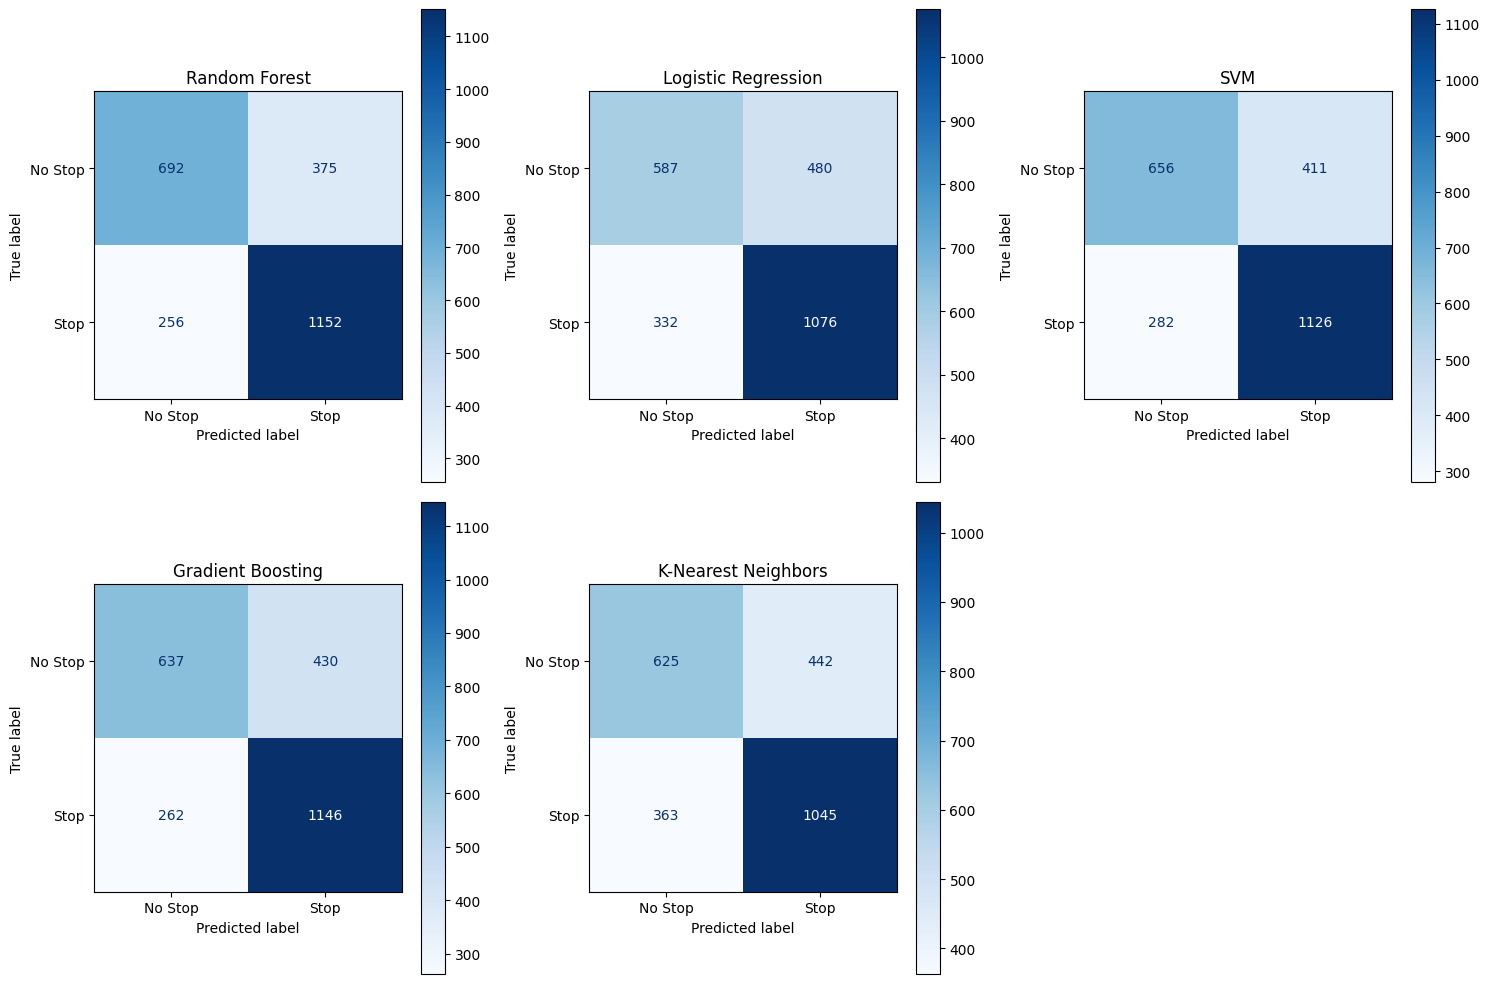

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

models_data = [
    ('Random Forest', rf_pred),
    ('Logistic Regression', lr_pred),
    ('SVM', svm_pred),
    ('Gradient Boosting', gb_pred),
    ('K-Nearest Neighbors', knn_pred)
]

for i, (name, predictions) in enumerate(models_data):
    ConfusionMatrixDisplay.from_predictions(
        y_test, predictions, 
        ax=axes[i], 
        cmap='Blues',
        display_labels=['No Stop', 'Stop']
    )
    axes[i].set_title(f'{name}')

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

MODEL PERFORMANCE COMPARISON
                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.7451     0.7544  0.8182    0.7850
Logistic Regression    0.6719     0.6915  0.7642    0.7260
SVM                    0.7200     0.7326  0.7997    0.7647
Gradient Boosting      0.7204     0.7272  0.8139    0.7681
K-Nearest Neighbors    0.6747     0.7028  0.7422    0.7219


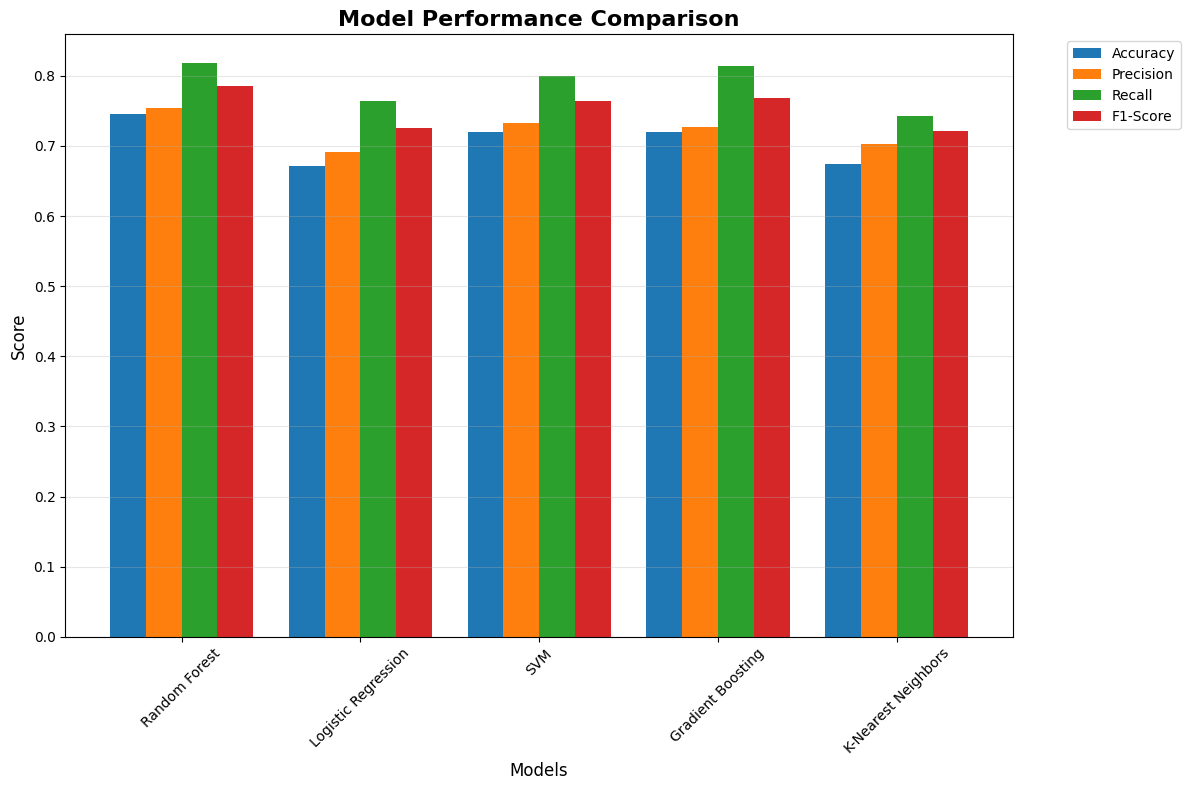

In [19]:
import pandas as pd

# Collect all results
results = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rf_pred),
        'Precision': precision_score(y_test, rf_pred),
        'Recall': recall_score(y_test, rf_pred),
        'F1-Score': f1_score(y_test, rf_pred)
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, lr_pred),
        'Precision': precision_score(y_test, lr_pred),
        'Recall': recall_score(y_test, lr_pred),
        'F1-Score': f1_score(y_test, lr_pred)
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, svm_pred),
        'Precision': precision_score(y_test, svm_pred),
        'Recall': recall_score(y_test, svm_pred),
        'F1-Score': f1_score(y_test, svm_pred)
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_score(y_test, gb_pred),
        'Precision': precision_score(y_test, gb_pred),
        'Recall': recall_score(y_test, gb_pred),
        'F1-Score': f1_score(y_test, gb_pred)
    },
    'K-Nearest Neighbors': {
        'Accuracy': accuracy_score(y_test, knn_pred),
        'Precision': precision_score(y_test, knn_pred),
        'Recall': recall_score(y_test, knn_pred),
        'F1-Score': f1_score(y_test, knn_pred)
    }
}

# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T
print("="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(comparison_df.round(4))

# Create bar chart comparison
fig, ax = plt.subplots(figsize=(12, 8))
comparison_df.plot(kind='bar', ax=ax, width=0.8)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# Find the best model for each metric
best_models = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    best_models[metric] = (best_model, best_score)

print("\n" + "="*50)
print("BEST PERFORMING MODELS")
print("="*50)
for metric, (model, score) in best_models.items():
    print(f"{metric:12}: {model:20} ({score:.4f})")


BEST PERFORMING MODELS
Accuracy    : Random Forest        (0.7451)
Precision   : Random Forest        (0.7544)
Recall      : Random Forest        (0.8182)
F1-Score    : Random Forest        (0.7850)


Hyperparameter

Random Forest - Testing different n_estimators:
n_estimators=50: Accuracy = 0.7406
n_estimators=100: Accuracy = 0.7451
n_estimators=200: Accuracy = 0.7491


([<matplotlib.axis.XTick at 0x201125e12a0>,
 [Text(0, 0, '50'), Text(1, 0, '100'), Text(2, 0, '200')])

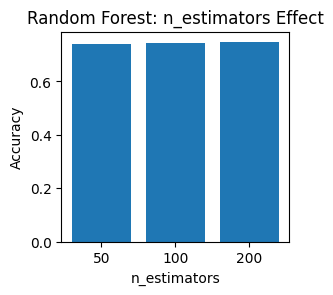

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest with different n_estimators
print("Random Forest - Testing different n_estimators:")
rf_results = {}
n_estimators_values = [50, 100, 200]

for n_est in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, rf_pred)
    rf_results[f'n_estimators_{n_est}'] = accuracy
    print(f"n_estimators={n_est}: Accuracy = {accuracy:.4f}")

# Plot Random Forest results
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.bar(range(len(n_estimators_values)), list(rf_results.values()))
plt.title('Random Forest: n_estimators Effect')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(range(len(n_estimators_values)), n_estimators_values)


Logistic Regression - Testing different C values:
C=0.1: Accuracy = 0.6715
C=1.0: Accuracy = 0.6719
C=10.0: Accuracy = 0.6715


([<matplotlib.axis.XTick at 0x20112630460>,
 [Text(0, 0, '0.1'), Text(1, 0, '1.0'), Text(2, 0, '10.0')])

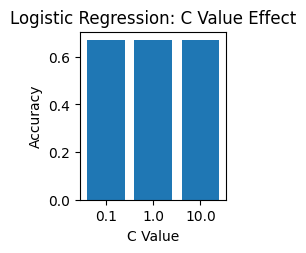

In [22]:
# Logistic Regression with different C values
print("\nLogistic Regression - Testing different C values:")
lr_results = {}
c_values = [0.1, 1.0, 10.0]

for c_val in c_values:
    lr_model = LogisticRegression(C=c_val, random_state=42, max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, lr_pred)
    lr_results[f'C_{c_val}'] = accuracy
    print(f"C={c_val}: Accuracy = {accuracy:.4f}")

# Plot Logistic Regression results
plt.subplot(2, 3, 2)
plt.bar(range(len(c_values)), list(lr_results.values()))
plt.title('Logistic Regression: C Value Effect')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xticks(range(len(c_values)), c_values)


SVM - Testing different C values:
C=0.1: Accuracy = 0.6873
C=1.0: Accuracy = 0.7200
C=10.0: Accuracy = 0.7374


([<matplotlib.axis.XTick at 0x201126847f0>,
 [Text(0, 0, '0.1'), Text(1, 0, '1.0'), Text(2, 0, '10.0')])

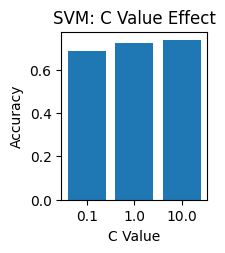

In [23]:
# SVM with different C values
print("\nSVM - Testing different C values:")
svm_results = {}
svm_c_values = [0.1, 1.0, 10.0]

for c_val in svm_c_values:
    svm_model = SVC(C=c_val, random_state=42)
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, svm_pred)
    svm_results[f'C_{c_val}'] = accuracy
    print(f"C={c_val}: Accuracy = {accuracy:.4f}")

# Plot SVM results
plt.subplot(2, 3, 3)
plt.bar(range(len(svm_c_values)), list(svm_results.values()))
plt.title('SVM: C Value Effect')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xticks(range(len(svm_c_values)), svm_c_values)


Gradient Boosting - Testing different learning rates:
learning_rate=0.05: Accuracy = 0.7127
learning_rate=0.1: Accuracy = 0.7204
learning_rate=0.2: Accuracy = 0.7289


([<matplotlib.axis.XTick at 0x201126de470>,
 [Text(0, 0, '0.05'), Text(1, 0, '0.1'), Text(2, 0, '0.2')])

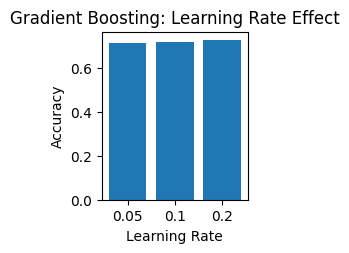

In [24]:
# Gradient Boosting with different learning rates
print("\nGradient Boosting - Testing different learning rates:")
gb_results = {}
learning_rates = [0.05, 0.1, 0.2]

for lr in learning_rates:
    gb_model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, gb_pred)
    gb_results[f'lr_{lr}'] = accuracy
    print(f"learning_rate={lr}: Accuracy = {accuracy:.4f}")

# Plot Gradient Boosting results
plt.subplot(2, 3, 4)
plt.bar(range(len(learning_rates)), list(gb_results.values()))
plt.title('Gradient Boosting: Learning Rate Effect')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(range(len(learning_rates)), learning_rates)


KNN - Testing different n_neighbors:
n_neighbors=3: Accuracy = 0.6739
n_neighbors=5: Accuracy = 0.6747
n_neighbors=7: Accuracy = 0.6816


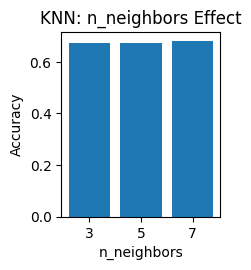

In [25]:
# KNN with different n_neighbors
print("\nKNN - Testing different n_neighbors:")
knn_results = {}
k_values = [3, 5, 7]

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred)
    knn_results[f'k_{k}'] = accuracy
    print(f"n_neighbors={k}: Accuracy = {accuracy:.4f}")

# Plot KNN results
plt.subplot(2, 3, 5)
plt.bar(range(len(k_values)), list(knn_results.values()))
plt.title('KNN: n_neighbors Effect')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(len(k_values)), k_values)

plt.tight_layout()
plt.show()

In [26]:
# Create summary table
hyperparameter_summary = {
    'Random Forest (n_estimators)': rf_results,
    'Logistic Regression (C)': lr_results,
    'SVM (C)': svm_results,
    'Gradient Boosting (learning_rate)': gb_results,
    'KNN (n_neighbors)': knn_results
}

print("\n" + "="*80)
print("HYPERPARAMETER EFFECT SUMMARY")
print("="*80)

for algorithm, results in hyperparameter_summary.items():
    print(f"\n{algorithm}:")
    best_param = max(results, key=results.get)
    best_accuracy = results[best_param]
    worst_param = min(results, key=results.get)
    worst_accuracy = results[worst_param]
    
    print(f"  Best: {best_param} = {best_accuracy:.4f}")
    print(f"  Worst: {worst_param} = {worst_accuracy:.4f}")
    print(f"  Improvement: {best_accuracy - worst_accuracy:.4f}")
    
    for param, acc in results.items():
        print(f"    {param}: {acc:.4f}")


HYPERPARAMETER EFFECT SUMMARY

Random Forest (n_estimators):
  Best: n_estimators_200 = 0.7491
  Worst: n_estimators_50 = 0.7406
  Improvement: 0.0085
    n_estimators_50: 0.7406
    n_estimators_100: 0.7451
    n_estimators_200: 0.7491

Logistic Regression (C):
  Best: C_1.0 = 0.6719
  Worst: C_0.1 = 0.6715
  Improvement: 0.0004
    C_0.1: 0.6715
    C_1.0: 0.6719
    C_10.0: 0.6715

SVM (C):
  Best: C_10.0 = 0.7374
  Worst: C_0.1 = 0.6873
  Improvement: 0.0501
    C_0.1: 0.6873
    C_1.0: 0.7200
    C_10.0: 0.7374

Gradient Boosting (learning_rate):
  Best: lr_0.2 = 0.7289
  Worst: lr_0.05 = 0.7127
  Improvement: 0.0162
    lr_0.05: 0.7127
    lr_0.1: 0.7204
    lr_0.2: 0.7289

KNN (n_neighbors):
  Best: k_7 = 0.6816
  Worst: k_3 = 0.6739
  Improvement: 0.0077
    k_3: 0.6739
    k_5: 0.6747
    k_7: 0.6816
